In [31]:
import pandas as pd

train_data = pd.read_csv(r"D:\Projects\Titanic-ML\train.csv") # your path here

def calculate_survival_rate(data, condition):
    total = data.loc[condition]
    total_count = len(total)
    rate = total_count / len(data.loc[condition.keys()])
    return total_count, rate

women_count, women_rate = calculate_survival_rate(train_data, (train_data.Sex == 'female') & (train_data.Survived == 0))
print(f"Total women who did not survive: {women_count}")
print(f"% of women who did not survive: {women_rate * 100:.3f} %\n")

men_count, men_rate = calculate_survival_rate(train_data, (train_data.Sex == 'male') & (train_data.Survived == 0))
print(f"Total men who did not survive: {men_count}")
print(f"% of men who did not survive: {men_rate * 100:.3f} %\n")

for i in range(1, 4):
    class_count, class_rate = calculate_survival_rate(train_data, (train_data.Pclass == i) & (train_data.Survived == 0))
    print(f"Total people in {i} Class who did not survive: {class_count}")
    print(f"% of people in {i} Class who did not survive: {class_rate * 100:.3f} %\n")

total_count, overall_rate = calculate_survival_rate(train_data, (train_data.Survived == 0))
print(f"Total who did not survive: {total_count}")
print(f"% of all people who did not survive: {overall_rate * 100:.3f} %\n")

Total women who did not survive: 81
% of women who did not survive: 9.091 %

Total men who did not survive: 468
% of men who did not survive: 52.525 %

Total people in 1 Class who did not survive: 80
% of people in 1 Class who did not survive: 8.979 %

Total people in 2 Class who did not survive: 97
% of people in 2 Class who did not survive: 10.887 %

Total people in 3 Class who did not survive: 372
% of people in 3 Class who did not survive: 41.751 %

Total who did not survive: 549
% of all people who did not survive: 61.616 %



In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

train_data = pd.read_csv(r"D:\Projects\Titanic-ML\train.csv")  # your path here

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 1]
}

param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy')

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10, scoring='accuracy')

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=10, scoring='accuracy')

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=10, scoring='accuracy')

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=10, scoring='accuracy')

grid_search_ab = GridSearchCV(AdaBoostClassifier(), param_grid_ab, cv=10, scoring='accuracy')

grid_search_et = GridSearchCV(ExtraTreesClassifier(), param_grid_et, cv=10, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_ab.fit(X_train, y_train)
grid_search_et.fit(X_train, y_train)

print('best estimator RandomForest:',grid_search_rf.best_estimator_,'Best Score', grid_search_rf.best_estimator_.score(X_train,y_train))
print('best estimator KNN:',grid_search_knn.best_estimator_,'Best Score', grid_search_knn.best_estimator_.score(X_train,y_train))
print('best estimator LogisticRegression:',grid_search_lr.best_estimator_,'Best Score', grid_search_lr.best_estimator_.score(X_train,y_train))
print('best estimator SVC:',grid_search_svc.best_estimator_,'Best Score', grid_search_svc.best_estimator_.score(X_train,y_train))
print('best estimator GradientBoostingClassifier:',grid_search_gb.best_estimator_,'Best Score', grid_search_gb.best_estimator_.score(X_train,y_train))
print('best estimator AdaBoostClassifier:',grid_search_ab.best_estimator_,'Best Score', grid_search_ab.best_estimator_.score(X_train,y_train))
print('best estimator ExtraTreesClassifier:',grid_search_et.best_estimator_,'Best Score', grid_search_et.best_estimator_.score(X_train,y_train))

knn_best = grid_search_knn.best_estimator_
rf_best = grid_search_rf.best_estimator_
lr_best = grid_search_lr.best_estimator_
svc_best = grid_search_svc.best_estimator_
gb_best = grid_search_gb.best_estimator_
ab_best = grid_search_ab.best_estimator_
et_best = grid_search_et.best_estimator_


clf = VotingClassifier(
    estimators=[
        ('knn_best', knn_best), 
        ('rf_best', rf_best),
        ('lr_best', lr_best),
        ('svc_best', svc_best),
        ('gb_best', gb_best),
        ('ab_best', ab_best),
        ('et_best', et_best)
    ],
    voting='hard'
)
clf.fit(X_train,y_train)
print('Predictions with clf:', clf.predict(X_test)[:10])
clf_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Cross-validation score for clf:', clf_score)

rf_predictions = rf_best.predict(X_test)
knn_predictions = knn_best.predict(X_test)
lr_predictions = lr_best.predict(X_test)
svc_predictions = svc_best.predict(X_test)
gb_predictions = gb_best.predict(X_test)
ab_predictions = ab_best.predict(X_test)
et_predictions = et_best.predict(X_test)

print('Predictions with RandomForest:', rf_predictions[:10])
print('Predictions with KNN:', knn_predictions[:10])
print('Predictions with LogisticRegression:', lr_predictions[:10])
print('Predictions with SVC:', svc_predictions[:10])
print('Predictions with GradientBoostingClassifier:', gb_predictions[:10])
print('Predictions with AdaBoostClassifier:', ab_predictions[:10])
print('Predictions with ExtraTreesClassifier:', et_predictions[:10])

# Evaluate models using cross-validation
rf_cv_score = cross_val_score(rf_best, X_train, y_train, cv=10, scoring='accuracy').mean()
knn_cv_score = cross_val_score(knn_best, X_train, y_train, cv=10, scoring='accuracy').mean()
lr_cv_score = cross_val_score(lr_best, X_train, y_train, cv=10, scoring='accuracy').mean()
svc_cv_score = cross_val_score(svc_best, X_train, y_train, cv=10, scoring='accuracy').mean()
gb_cv_score = cross_val_score(gb_best, X_train, y_train, cv=10, scoring='accuracy').mean()
ab_cv_score = cross_val_score(ab_best, X_train, y_train, cv=10, scoring='accuracy').mean()
et_cv_score = cross_val_score(et_best, X_train, y_train, cv=10, scoring='accuracy').mean()

print('Cross-validation score for RandomForest:', rf_cv_score)
print('Cross-validation score for KNN:', knn_cv_score)
print('Cross-validation score for LogisticRegression:', lr_cv_score)
print('Cross-validation score for SVC:', svc_cv_score)
print('Cross-validation score for GradientBoostingClassifier:', gb_cv_score)
print('Cross-validation score for AdaBoostClassifier:', ab_cv_score)
print('Cross-validation score for ExtraTreesClassifier:', et_cv_score)

D:\Anaconda\envs\my-course\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

best estimator RandomForest: RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200) Best Score 0.8120805369127517
best estimator KNN: KNeighborsClassifier(algorithm='brute', leaf_size=20, n_neighbors=15, p=1) Best Score 0.802013422818792
best estimator LogisticRegression: LogisticRegression(C=10, solver='liblinear') Best Score 0.8036912751677853
best estimator SVC: SVC(C=1, gamma='auto') Best Score 0.8087248322147651
best estimator GradientBoostingClassifier: GradientBoostingClassifier(learning_rate=0.01, n_estimators=200) Best Score 0.8137583892617449
best estimator AdaBoostClassifier: AdaBoostClassifier(learning_rate=0.05, n_estimators=200) Best Score 0.8070469798657718
best estimator ExtraTreesClassifier: ExtraTreesClassifier(max_depth=5, min_samples_leaf=2) Best Score 0.8137583892617449


D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Predictions with clf: [0 0 0 1 1 0 1 1 0 1]


D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\A

Cross-validation score for clf: 0.8054237288135594
Predictions with RandomForest: [0 0 0 1 0 0 1 1 1 1]
Predictions with KNN: [0 0 0 1 1 0 1 1 0 1]
Predictions with LogisticRegression: [0 0 0 1 1 0 1 1 0 1]
Predictions with SVC: [0 0 0 1 1 0 1 1 0 1]
Predictions with GradientBoostingClassifier: [0 0 0 1 0 0 1 1 0 1]
Predictions with AdaBoostClassifier: [0 0 0 1 1 0 1 1 0 1]
Predictions with ExtraTreesClassifier: [0 0 0 1 1 0 1 1 0 1]


D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\envs\my-course\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\A

Cross-validation score for RandomForest: 0.7868926553672316
Cross-validation score for KNN: 0.8021186440677968
Cross-validation score for LogisticRegression: 0.8055084745762713
Cross-validation score for SVC: 0.8054237288135594
Cross-validation score for GradientBoostingClassifier: 0.8003389830508475
Cross-validation score for AdaBoostClassifier: 0.7988135593220338
Cross-validation score for ExtraTreesClassifier: 0.803728813559322


In [9]:
import pandas as pd
test_data = pd.read_csv(r"D:\Projects\Titanic-ML\test.csv")# your path here
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_test = pd.get_dummies(test_data[features])
clf_predict = clf.predict(X_test)
clf_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': clf_predict})
clf_output.to_csv(r"D:\Projects\Titanic-ML\predictions.csv", index=False)# your path here

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

train_data = pd.read_csv(r"D:\Projects\Titanic-ML\train.csv")# your path here
test_data = pd.read_csv(r"D:\Projects\Titanic-ML\test.csv")# your path here

y_train = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 7, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy')
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)

knn_best = grid_search_knn.best_estimator_
rf_best = grid_search_rf.best_estimator_

clf = VotingClassifier(
		estimators=[('knn_best', knn_best),('rf_best', rf_best)],
        voting='hard'
	)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [11]:
output.to_csv(r"D:\Projects\Titanic-ML\predictions.csv", index=False)# your path here

In [12]:
import pandas as pd
test_data = pd.read_csv(r"D:\Projects\Titanic-ML\train.csv")# your path here
test_data.head(10)
test_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


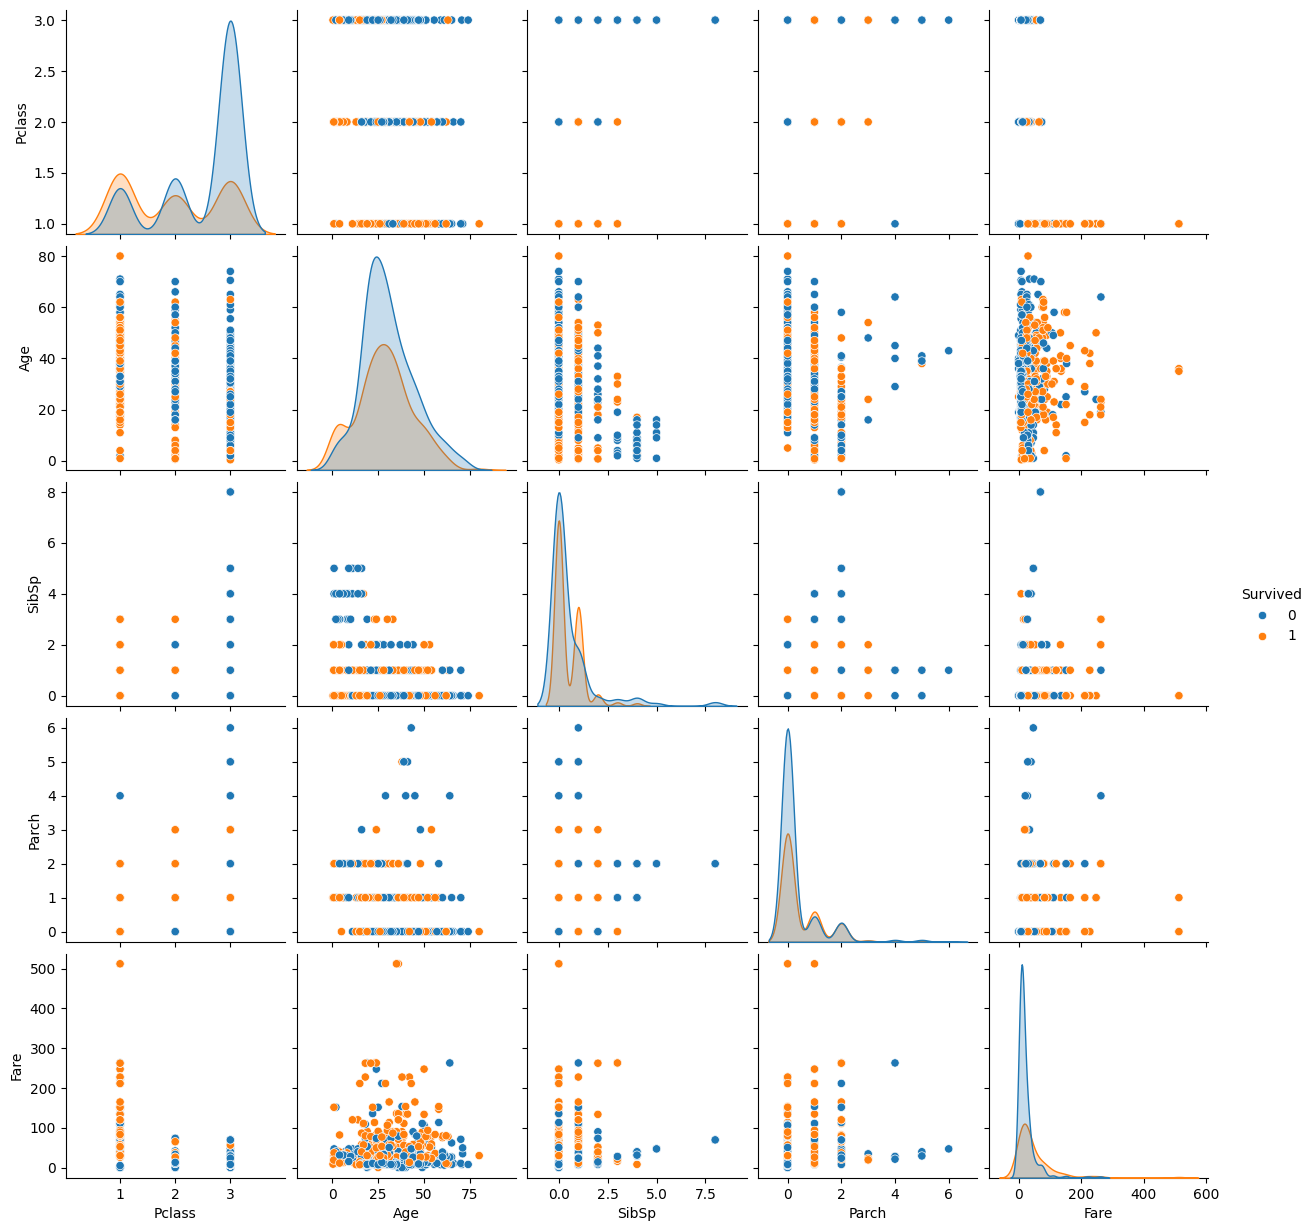

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pairplot
sns.pairplot(train_data[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Survived']], hue='Survived', diag_kind='kde')
plt.show()

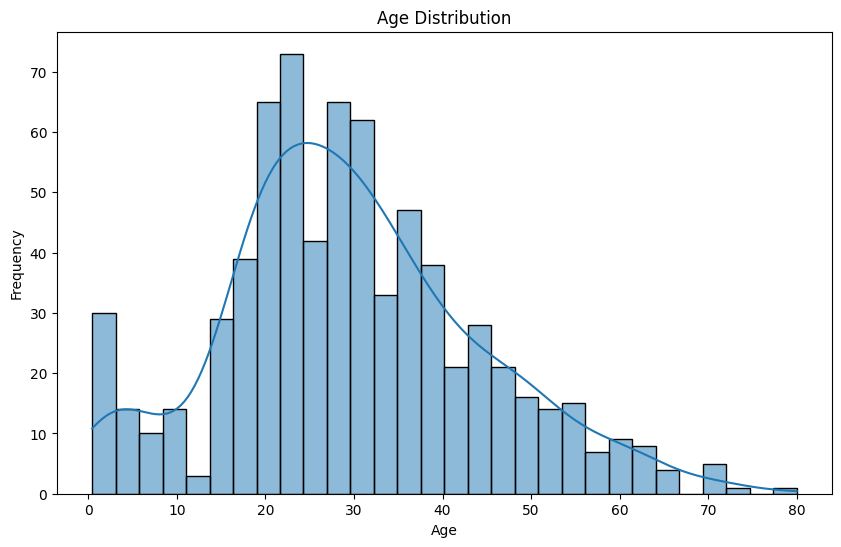

In [55]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

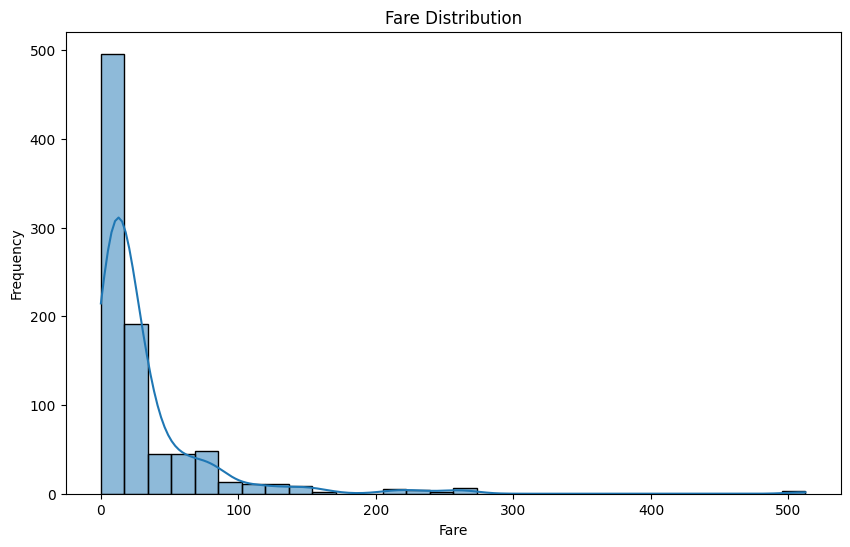

In [54]:
# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

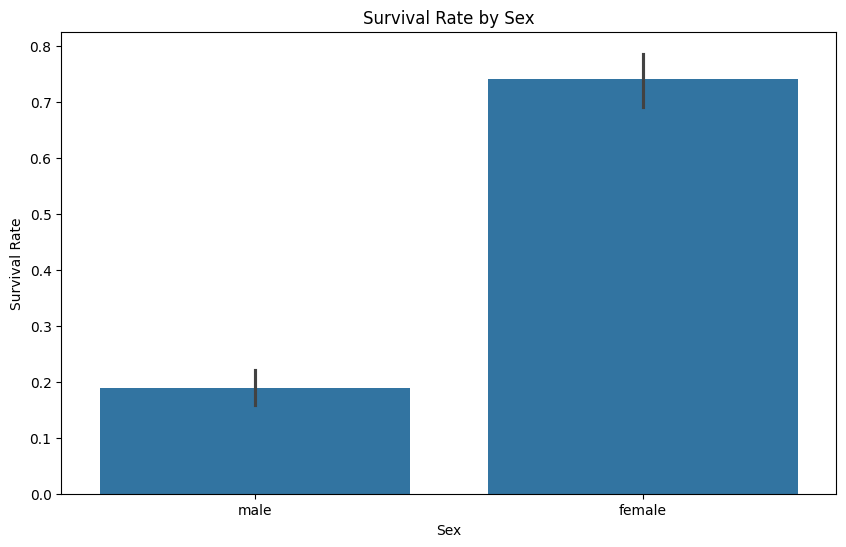

In [53]:
# Survival Rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

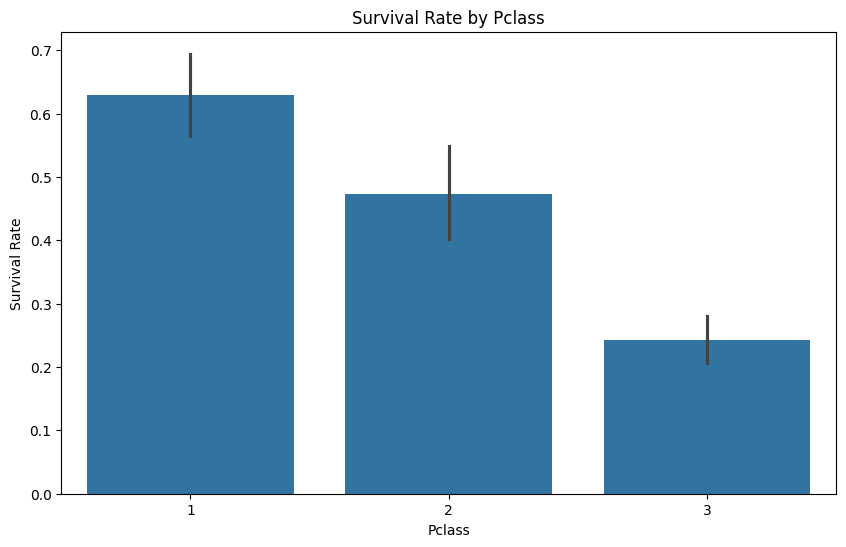

In [52]:
# Survival Rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

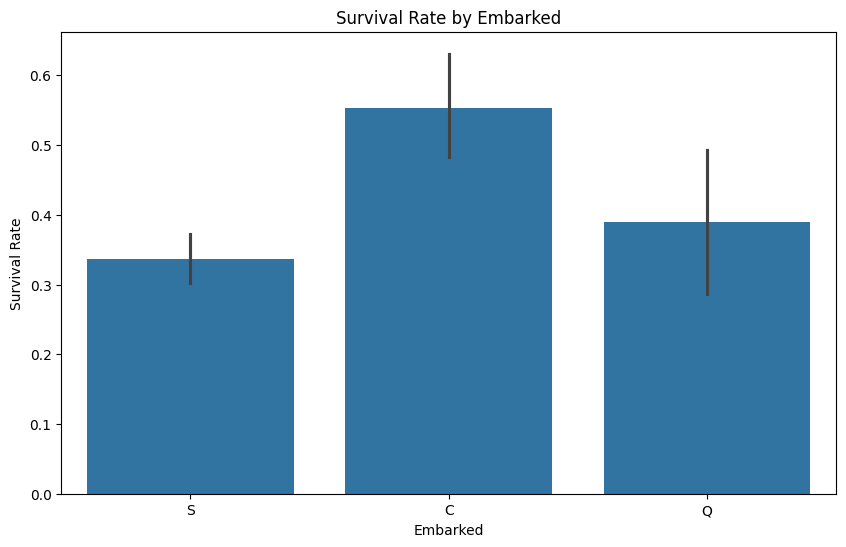

In [50]:
# Survival Rate by Embarked
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()